<a href="https://colab.research.google.com/github/tashidu/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [3]:
import numpy as np
import pandas as pd
import opendatasets as od
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [5]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tashiduvinuka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:00<00:00, 789MB/s] 


In [6]:
batch_size =32
image_size =(128,128)

In [7]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [33]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                                   batch_size=batch_size,
                                                         subset="training",
                                                         validation_split=0.1,
                                             image_size=image_size,
                                                                  seed =42,
                                                           label_mode='binary')

Found 8000 files belonging to 2 classes.
Using 7200 files for training.


In [34]:
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                                   batch_size=batch_size,
                                                         subset="validation",
                                                         validation_split=0.1,
                                             image_size=image_size,
                                                                  seed =42,
                                                                label_mode='binary')

Found 8000 files belonging to 2 classes.
Using 800 files for validation.


In [37]:
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                                   batch_size=batch_size,


                                             image_size=image_size,
                                                                  seed =42)

Found 2000 files belonging to 2 classes.


In [38]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [39]:
for image_batch , label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32, 1)


In [40]:
train_data = train_data.map(lambda x,y : (x/255,y))
validation_data=validation_data.map(lambda x,y : (x/255,y))
test_data=test_data.map(lambda x,y : (x/255,y))

In [41]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape =(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [42]:
#model Building
model =tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,683,009 (6.42 MB)

 Trainable params: 1,682,881 (6.42 MB)

 Non-trainable params: 128 (512.00 B)

In [44]:
#complile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
start_time = time.time()

history = model.fit(
    train_data,
    epochs =20 ,
    validation_data = validation_data,

)
end_time=time.time()
print(end_time-start_time)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5576 - loss: 0.6976 - val_accuracy: 0.6562 - val_loss: 0.6660
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6049 - loss: 0.6539 - val_accuracy: 0.6237 - val_loss: 0.6448
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6532 - loss: 0.6262 - val_accuracy: 0.5550 - val_loss: 0.9860
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6558 - loss: 0.6103 - val_accuracy: 0.6225 - val_loss: 0.6321
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6628 - loss: 0.5988 - val_accuracy: 0.6837 - val_loss: 0.6116
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6839 - loss: 0.5934 - val_accuracy: 0.6513 - val_loss: 0.7502
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6944 - loss: 0.5809 - val_accuracy: 0.6712 - val_loss: 0.5728
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6913 - loss: 0.5773 - val_a

In [46]:
history.history

{'accuracy': [0.5799999833106995,
  0.6120833158493042,
  0.6494444608688354,
  0.6627777814865112,
  0.6683333516120911,
  0.6870833039283752,
  0.6961110830307007,
  0.7006944417953491,
  0.7188888788223267,
  0.7411110997200012,
  0.7443055510520935,
  0.7512500286102295,
  0.7620833516120911,
  0.7668055295944214,
  0.7724999785423279,
  0.7786111235618591,
  0.7802777886390686,
  0.7905555367469788,
  0.7894444465637207,
  0.7901389002799988],
 'loss': [0.6804618835449219,
  0.6484012007713318,
  0.624678373336792,
  0.6069959402084351,
  0.5955423712730408,
  0.585640549659729,
  0.5779516696929932,
  0.5652041435241699,
  0.5479381680488586,
  0.5262016654014587,
  0.516708254814148,
  0.5050554275512695,
  0.4980369508266449,
  0.47948333621025085,
  0.47350525856018066,
  0.4654948115348816,
  0.46198010444641113,
  0.44359061121940613,
  0.43627506494522095,
  0.44403043389320374],
 'val_accuracy': [0.65625,
  0.6237499713897705,
  0.5550000071525574,
  0.6225000023841858,
  

In [48]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuuracy = tf.keras.metrics.BinaryAccuracy()

In [50]:
predictions = model.predict(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [51]:
predicted_classes = (predictions > 0.5).astype("int32")

In [52]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

for images, labels in test_data:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32")
    precision.update_state(labels, preds)
    recall.update_state(labels, preds)
    accuracy.update_state(labels, preds)

print(f"Test Precision: {precision.result().numpy()}")
print(f"Test Recall: {recall.result().numpy()}")
print(f"Test Accuracy: {accuracy.result().numpy()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━

In [53]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7348 - loss: 0.5400
Test Loss: 0.5389097929000854
Test Accuracy: 0.7400000095367432


In [54]:
!pip install opencv-python

In [55]:
import cv2

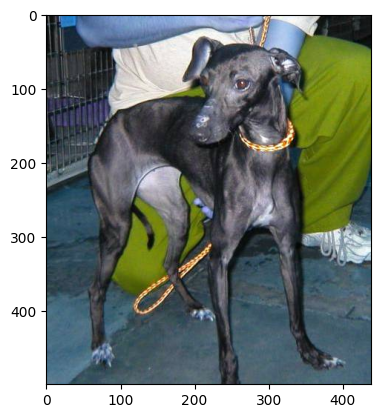

In [59]:
image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4004.jpg")
plt.imshow( image)
plt.show()

In [60]:
resized_image = cv2.resize(image,(image_size))
scaled_imge=resized_image/255

In [61]:
scaled_imge

array([[[0.10588235, 0.12156863, 0.12941176],
        [0.08235294, 0.10196078, 0.10196078],
        [0.05882353, 0.0745098 , 0.09019608],
        ...,
        [0.11372549, 0.12156863, 0.1254902 ],
        [0.11372549, 0.12156863, 0.12156863],
        [0.10588235, 0.11764706, 0.11764706]],

       [[0.13333333, 0.13333333, 0.13333333],
        [0.14509804, 0.14901961, 0.1372549 ],
        [0.04705882, 0.05098039, 0.03921569],
        ...,
        [0.11372549, 0.11764706, 0.1254902 ],
        [0.0745098 , 0.08235294, 0.08235294],
        [0.08235294, 0.09019608, 0.09019608]],

       [[0.07843137, 0.09019608, 0.09803922],
        [0.16078431, 0.17647059, 0.17254902],
        [0.04705882, 0.0627451 , 0.04705882],
        ...,
        [0.08627451, 0.09411765, 0.09803922],
        [0.0745098 , 0.08235294, 0.08235294],
        [0.08235294, 0.09019608, 0.09019608]],

       ...,

       [[0.33333333, 0.47058824, 0.54901961],
        [0.33333333, 0.47058824, 0.54901961],
        [0.3254902 , 0

In [62]:
np.expand_dims(scaled_imge ,0).shape


(1, 128, 128, 3)

In [65]:
y_hat= model.predict(np.expand_dims(scaled_imge ,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [66]:
y_hat

array([[0.94312006]], dtype=float32)

In [67]:
class_names

['cats', 'dogs']

In [68]:
if y_hat > 0.5:
  print("Dog")
else:
  print("Cat")

Dog
